# 📊 EDA - Retail Forecasting Analysis

## Project Overview
This project implements an **end-to-end machine learning solution** for retail demand forecasting, predicting 3-month sales volumes for 50 products across 10 stores. The solution leverages **supervised learning techniques** specifically designed for time series forecasting using historical sales data.

### 🎯 **Business Problem**
Retail managers need accurate demand forecasts to:
- Optimize inventory management across multiple locations
- Reduce stockouts and overstock situations  
- Improve customer satisfaction through product availability
- Make informed investment decisions for business growth

### 📈 **Dataset Characteristics**
- **Time Period**: 5 years of historical data (2013-2017)
- **Scope**: 50 unique products across 10 store locations
- **Prediction Horizon**: 3-month forward forecast
- **Data Source**: [Kaggle Demand Forecasting Competition](https://www.kaggle.com/competitions/demand-forecasting-kernels-only/overview)

## 🔄 **CRISP-DM Methodology**

This project follows the industry-standard **CRISP-DM (Cross-Industry Standard Process for Data Mining)** framework:

| Phase | Objective | Notebook |
|-------|-----------|--------|
| **1. Business Understanding** | Define objectives and success criteria | ✅ This Notebook |
| **2. Data Understanding** | Explore data characteristics and quality | ✅ This Notebook |
| **3. Data Preparation** | Feature engineering and preprocessing | 🔄 Modeling Notebook |
| **4. Modeling** | Algorithm selection and training | 🔄 Modeling Notebook |
| **5. Evaluation** | Model performance assessment | 🔄 Modeling Notebook |
| **6. Deployment** | Production implementation strategy | Out of scope |

## 📋 **Notebook Scope**

### **Primary Objectives**
This EDA notebook focuses on **Business Understanding** and **Data Understanding** phases:

1. **📊 Data Quality Assessment**
   - Missing values and data integrity checks
   - Outlier detection and treatment strategies
   - Data type validation and corrections

2. **🔍 Pattern Discovery**
   - Temporal trends and seasonality analysis
   - Store and product performance variations
   - Sales distribution characteristics

3. **💡 Business Insights Generation**
   - Identification of high-performing stores/products
   - Seasonal demand patterns for inventory planning
   - Data-driven recommendations for business strategy

4. **🎯 Modeling Strategy Foundation**
   - Feature engineering requirements
   - Data preprocessing needs
   - Model selection considerations

### **Expected Outcomes**
- Comprehensive understanding of sales patterns and trends
- Clear identification of seasonal and cyclical behaviors
- Data quality assessment and preprocessing requirements
- Strategic insights for inventory and business planning
- Foundation for robust forecasting model development

# 1. 💼 Business Understanding

## 🎯 **Problem Statement**

A retail store manager faces the critical challenge of **optimizing inventory management and investment strategies** across 10 stores for 50 different products. The goal is to effectively meet customer demand while maximizing profitability and operational efficiency.

## 🚀 **Strategic Objectives**

The implementation of predictive analytics aims to achieve the following key objectives:

### **Primary Goals:**
1. **📊 Pattern Discovery**: Identify valuable business insights about sales over time, including seasonal patterns, trends, and general characteristics that drive demand
2. **🔮 Predictive Modeling**: Construct a robust model capable of accurately predicting sales for 50 items across 10 stores over a three-month horizon
3. **💰 Financial Impact Assessment**: Quantify the financial benefits and ROI of implementing data-driven forecasting

### **Operational Benefits:**
- **Inventory Optimization**: Reduce carrying costs while maintaining service levels
- **Demand Planning**: Improve accuracy of procurement and staffing decisions  
- **Customer Satisfaction**: Minimize stockouts and improve product availability
- **Strategic Planning**: Enable data-driven investment and expansion decisions

## 📈 **Expected Business Impact**

### **Immediate Benefits:**
- **Cost Reduction**: Lower inventory holding costs and waste from obsolete stock
- **Revenue Enhancement**: Increased sales through better product availability
- **Operational Efficiency**: Optimized resource allocation and planning

### **Strategic Advantages:**
- **Competitive Edge**: Better demand sensing and market responsiveness
- **Scalability**: Framework for expanding forecasting to additional stores/products
- **Decision Support**: Data-driven insights for strategic business decisions

## ✅ **Success Criteria**

The project will be considered successful when it enables the retail manager to:
- Make informed inventory and investment decisions based on accurate demand forecasts
- Reduce stockouts and overstock situations across all locations
- Improve overall store performance through optimized operations
- Achieve measurable financial improvements in margins and efficiency

> **🎯 Outcome**: By implementing this forecasting solution, the business problem of inefficient inventory management and suboptimal investment decisions will be resolved through data-driven insights and predictive capabilities.

### 📚 Library Imports and Environment Setup

This section configures our analytical environment with essential libraries and custom visualization settings for comprehensive time series analysis and exploratory data analysis.

```python
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization parameters
%matplotlib inline
sns.set(style="whitegrid")

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
```

### Data Loading

In this section, we load the data into our environment, ensuring it's in the correct format for analysis.

```python
# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Display the first few rows of the dataset
data.head()
```

### Data Cleaning

Here we clean the data, handling missing values and correcting data types as necessary.

```python
# Check for missing values
data.isnull().sum()

# Fill or impute missing values as appropriate
data.fillna(method='ffill', inplace=True)

# Convert date column to datetime type
data['date'] = pd.to_datetime(data['date'])
```

### Exploratory Data Analysis (EDA)

This section includes various EDA techniques to understand the data distribution and relationships better.

```python
# Summary statistics of the dataset
data.describe()

# Visualize the distribution of key variables
sns.histplot(data['variable_of_interest'], bins=30, kde=True)

# Examine relationships between variables
sns.pairplot(data)
```

### Time Series Analysis

Here we perform time series analysis, looking at trends, seasonality, and other temporal dynamics.

```python
# Set the date column as the index
data.set_index('date', inplace=True)

# Plot the time series data
data['value'].plot(figsize=(12, 6))

# Decompose the time series into trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['value'], model='additive')
result.plot()
```

### Conclusion

In this notebook, we have imported necessary libraries, loaded and cleaned our data, and performed exploratory data analysis and time series analysis. This comprehensive approach provides a solid foundation for any further analysis or modeling.

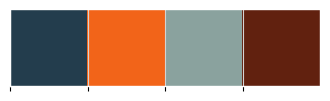

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm

# Add parent directory to path to find src module
import sys
import os
# Get the parent directory of the current notebook directory
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Utils.
from src.modelling_utils import create_time_series_features, time_series_split, plot_time_series_split

# Warnings filtering.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['figure.titlesize']    = 25
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['font.size']           = 12
mpl.rcParams['axes.grid']           = True
# mpl.rcParams['figure.dpi']          = 150

# Palette Seting
ts_palette = ['#233D4D', '#F26419', '#8AA29E', '#61210F']
kde_palette = ['#233D4D', '#61210F']

sns.set_palette(sns.color_palette(ts_palette))
sns.palplot(sns.color_palette(ts_palette))

# 2. 📊 Data Understanding

## 🎯 **Objective**
Comprehensive assessment of our retail sales dataset to understand its structure, quality, and characteristics before proceeding with exploratory analysis and modeling.

## 📋 **Dataset Overview**

| Attribute | Details |
|-----------|---------|
| **Time Coverage** | 5 years (2013-01-01 to 2017-12-31) |
| **Business Scope** | 50 unique items across 10 store locations |
| **Data Source** | [Kaggle Demand Forecasting Competition](https://www.kaggle.com/competitions/demand-forecasting-kernels-only/overview) |
| **Update Frequency** | Daily sales records |

## 🔍 **Analysis Framework**

This data understanding phase will systematically examine:

### **Data Quality Assessment**
- **Completeness**: Missing values and data gaps
- **Consistency**: Duplicates and data integrity  
- **Accuracy**: Outliers and anomalous patterns
- **Validity**: Data types and format correctness

### **Structural Analysis**
- **Dimensions**: Dataset size and shape
- **Features**: Variable types and characteristics
- **Relationships**: Inter-variable dependencies
- **Distributions**: Statistical summaries and patterns

### **Business Relevance**
- **Temporal Coverage**: Adequate historical depth for forecasting
- **Granularity**: Appropriate detail level for business decisions
- **Representativeness**: Coverage of business operations and scenarios

In [2]:
data_path = '../data/train.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


### 📖 Data Dictionary

Comprehensive description of dataset variables and their business significance:

| Variable | Data Type | Description | Business Context |
|----------|-----------|-------------|------------------|
| **📅 Date** | `datetime64` | Transaction date (YYYY-MM-DD) | **Temporal Index**: Critical for time series analysis, seasonality detection, and trend identification |
| **🏪 Store** | `int64` (Categorical) | Store identifier (1-10) | **Location Dimension**: Enables store-level performance analysis, regional patterns, and location-specific forecasting |
| **🛍️ Item** | `int64` (Categorical) | Product identifier (1-50) | **Product Dimension**: Supports item-level demand analysis, product lifecycle understanding, and SKU-specific forecasting |
| **📈 Sales** | `int64` (Continuous) | Units sold per day | **Target Variable**: Primary metric for forecasting, represents customer demand and business performance |

### 🎯 **Key Relationships**
- **Temporal**: Daily sales patterns across 5-year period
- **Spatial**: Store-level performance variations and geographic patterns  
- **Cross-sectional**: Item-specific demand characteristics and product interactions
- **Hierarchical**: Store-Item combinations creating 500 unique time series (10 × 50)

### 📊 Dataset Structure and Information

Examining the fundamental characteristics of our dataset to understand data types, memory usage, and structural integrity.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 913000 rows and 4 columns.


### ✅ **Initial Data Quality Assessment**

**Key Findings:**
- ✅ **No Missing Values**: Dataset is complete with no null entries
- ⚠️ **Date Format Issue**: Date column stored as object (string) rather than datetime
- ✅ **Data Integrity**: All records appear structurally valid

**Next Steps:**
- Convert date column to proper datetime format for time series analysis
- Set date as index for temporal operations and visualizations

### 📈 Descriptive Statistics Analysis

Understanding the central tendencies, variability, and distribution characteristics of our sales data to identify patterns and potential data quality issues.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.500000,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.500000,14.430878,1.0,13.0,25.5,38.0,50.0
sales,913000.0,52.250287,28.801144,0.0,30.0,47.0,70.0,231.0


### 📊 **Sales Distribution Insights**

**Statistical Summary:**
- **Range**: Sales vary from 0 to 231 units per day
- **Central Tendency**: Mean (52.25) > Median (47) indicates right-skewed distribution
- **Variability**: Standard deviation shows moderate spread in daily sales

**Key Observations:**

#### 🔍 **Distribution Characteristics**
- **Right Skewness**: Most sales concentrated at lower values with occasional high-volume days
- **Outlier Presence**: Maximum of 231 units significantly exceeds 75th percentile (70 units)
- **Zero Sales**: Minimum of 0 indicates some store-item combinations have no-sale days

#### 💼 **Business Implications**
- **Inventory Planning**: Right-skewed distribution suggests need for flexible inventory strategies
- **Demand Variability**: Significant spread indicates varying demand patterns across stores/items
- **Peak Events**: High-value outliers may represent promotional periods or seasonal spikes
- **Forecasting Considerations**: Skewed distribution may benefit from log transformation in modeling

#### 🎯 **Modeling Insights**
- **Preprocessing Needs**: Distribution shape suggests potential for normalization techniques
- **Algorithm Selection**: Skewed data may favor tree-based models or require transformation
- **Validation Strategy**: Need to account for rare high-volume events in model evaluation

### 🔍 Data Quality Validation

Comprehensive check for missing values and duplicate records to ensure data integrity and reliability for analysis and modeling.

In [8]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

### ✅ **Data Quality Results**

**Excellent Data Quality Confirmed:**
- ✅ **Zero Missing Values**: Complete dataset with no null entries across all variables
- ✅ **No Duplicates**: Each record is unique, ensuring data integrity
- ✅ **Clean Dataset**: Ready for analysis without imputation or deduplication needs

**Quality Score: 100%** - Dataset meets highest standards for reliability and completeness, providing solid foundation for accurate forecasting model development.

### 🔄 Data Preprocessing and Temporal Setup

#### 🎯 **Objectives**
Prepare the dataset for time series analysis by converting data types and establishing proper temporal indexing.

#### 📋 **Processing Steps**

1. **📅 Date Conversion**
   - Convert `date` column from string to `datetime64` format
   - Enable temporal operations and date-based filtering

2. **🔗 Index Configuration** 
   - Set date as primary index for time series operations
   - Facilitate efficient temporal aggregation and visualization

3. **📊 Data Sorting**
   - Order by date, store, and item for consistent analysis
   - Ensure chronological sequence for time series modeling

#### 💡 **Business Rationale**

**Time Series Foundation:**
- Date indexing is critical for forecasting algorithms
- Enables temporal feature engineering (seasonality, trends, lags)
- Supports time-based data visualization and pattern analysis

**Analytical Benefits:**
- Streamlined temporal aggregations (monthly, quarterly trends)
- Efficient date-range filtering for train/test splits
- Enhanced visualization capabilities for time series plots

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_values(by=['date', 'store', 'item'], inplace=True)
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,1,2,33
2013-01-01,1,3,15
2013-01-01,1,4,10
2013-01-01,1,5,11


In [11]:
print(f'The data goes from {df.index.min()} to {df.index.max()}.')

The data goes from 2013-01-01 00:00:00 to 2017-12-31 00:00:00.


### Feature Engineering and Exploratory Data Analysis

This section focuses on two key aspects of our retail forecasting pipeline:

#### 🔧 **Feature Engineering**
We'll create initial time series features to extract valuable insights from our temporal data. These features will help capture:
- **Temporal patterns**: Day of week, month, quarter, year
- **Seasonal indicators**: Holiday effects, seasonal cycles
- **Trend components**: Long-term growth patterns

> **Note**: This represents the initial feature engineering phase. In the modeling notebook, we'll develop more sophisticated features including:
> - Lag features (sales from previous periods)
> - Rolling window statistics (moving averages, volatility)
> - Interaction features between stores and items
> - Advanced seasonal decomposition features

#### 📊 **Exploratory Data Analysis Objectives**
Our EDA will systematically uncover:

1. **Time Series Characteristics**
   - Trend analysis: Is there long-term growth or decline?
   - Seasonality detection: Monthly, weekly, or yearly patterns
   - Stationarity assessment: Statistical properties over time

2. **Sales Distribution Analysis**
   - Overall sales distribution and outlier identification
   - Store-level performance comparison
   - Item-level demand patterns

3. **Temporal Patterns**
   - Weekly sales cycles (weekday vs. weekend effects)
   - Monthly patterns (end-of-month effects, seasonal peaks)
   - Annual trends and growth patterns

4. **Business Insights**
   - Top-performing stores and items
   - Seasonal demand fluctuations
   - Inventory planning implications

These insights will directly inform our modeling strategy and help validate our forecasting approach for the 3-month prediction horizon.

In [12]:
df = create_time_series_features(data=df, target='sales', date_related=True)
df.head()

,store,item,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,is_wknd,is_month_start,is_month_end
date,,,,,,,,,,,,,
2013-01-01,1,1,13,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,2,33,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,3,15,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,4,10,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,5,11,1,1,1,2013,1,1,1.0,0,1,0


### 🔄 Time Series Train-Test Split Strategy

Before conducting our exploratory data analysis, we implement a **temporal data splitting strategy** that mirrors real-world forecasting scenarios and prevents data leakage.

#### 📋 **Methodology Rationale**

**Why Split Before EDA?**
- **Production Simulation**: We want to forecast 3 months of future sales data that we've never seen
- **Realistic Analysis**: EDA should only use information available at prediction time
- **Avoid Look-Ahead Bias**: Prevents incorporating future information into our analysis

#### ⚡ **Temporal Splitting Approach**

| Aspect | Details |
|--------|---------|
| **Split Method** | Chronological (temporal) split |
| **Training Period** | 2013-01-01 to 2017-09-30 (~4.75 years) |
| **Test Period** | 2017-10-01 to 2017-12-31 (3 months) |
| **Cutoff Date** | September 30, 2017 |

#### 🚫 **Why Not Random Split?**

**Random splitting would cause data leakage in time series because:**
- **Temporal Dependencies**: Future sales patterns would inform past predictions
- **Seasonality Contamination**: Test set seasonal patterns would influence training
- **Unrealistic Scenario**: Real forecasting never has access to future data

#### ✅ **Benefits of Temporal Split**

1. **Realistic Evaluation**: Simulates actual production forecasting environment
2. **Data Integrity**: Maintains temporal order and dependencies
3. **Business Alignment**: Matches the 3-month forecasting horizon requirement
4. **Model Validation**: Ensures model performance reflects real-world capability

> **⚠️ Important**: This chronological approach means our model will be tested on the most recent 3 months of data, providing the most realistic assessment of forecasting performance for future periods.

#### 🎯 **Expected Outcome**
The split will create:
- **Training Set**: Historical data for pattern learning and model development
- **Test Set**: Hold-out period for unbiased performance evaluation
- **Validation Framework**: Foundation for robust model assessment

In [13]:
CUTOFF_DATE = '2017-09-30'
train, test = time_series_split(df, CUTOFF_DATE)
print(f'Train shape: {train.shape}. Train data goes from {train.index.min()} to {train.index.max()}.')
print(f'Test shape: {test.shape}. Train data goes from {test.index.min()} to {test.index.max()}.')

Train shape: (866500, 13). Train data goes from 2013-01-01 00:00:00 to 2017-09-29 00:00:00.
Test shape: (46500, 13). Train data goes from 2017-09-30 00:00:00 to 2017-12-31 00:00:00.


### 📊 Train-Test Split Visualization

Visual representation of our temporal data splitting strategy, showing the clear separation between training and testing periods to validate our forecasting approach.

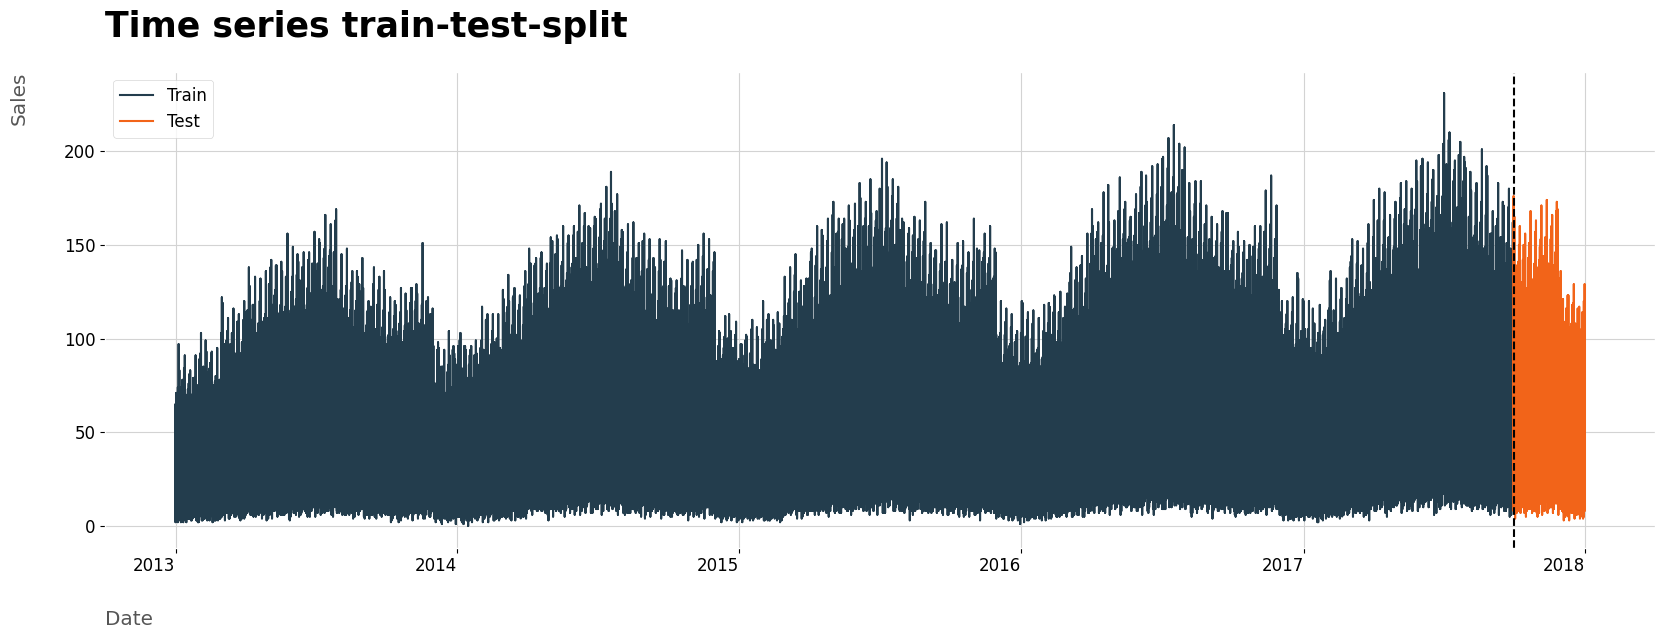

In [14]:
plot_time_series_split(train, test, CUTOFF_DATE)

## 🔍 Exploratory Data Analysis

Now we begin our comprehensive exploration of the training data to uncover patterns, trends, and insights that will inform our forecasting strategy and business decisions.

### 📊 **Analysis Framework**
- **Store Performance**: Individual store characteristics and performance metrics
- **Product Analysis**: Item-level demand patterns and variations
- **Temporal Patterns**: Time-based trends, seasonality, and cyclical behaviors
- **Distribution Analysis**: Sales patterns and outlier identification

In [15]:
print(f"There are {train['store'].nunique()} stores and {train['item'].nunique()} items.")

There are 10 stores and 50 items.


In [16]:
print(f'Number of items in each store: ')
train.groupby(['store'])['item'].nunique()

Number of items in each store: 


store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

There are 10 stores with 50 items.

### 📈 **Dataset Structure Confirmation**

**Balanced Business Structure:**
- ✅ **10 Stores**: Complete coverage across all retail locations
- ✅ **50 Items**: Full product portfolio representation
- ✅ **Uniform Distribution**: Each store carries all 50 items

This balanced structure ensures comprehensive forecasting capability across all store-item combinations, providing 500 unique time series for analysis.

### 🏪 Store Performance Analysis

Comprehensive statistical analysis of sales performance across all 10 store locations to identify top performers, underperformers, and performance patterns.

In [17]:
train.groupby(['store']).agg({'sales': ['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

sales                                               
       count      sum       mean median        std min  max
store                                                      
1      86650  4084466  47.137519   44.0  24.016892   1  155
2      86650  5792453  66.848852   62.0  33.618041   3  231
3      86650  5144873  59.375338   55.0  29.997813   3  196
4      86650  4744968  54.760162   51.0  27.749964   4  186
5      86650  3437398  39.669913   37.0  20.380008   2  130
6      86650  3433953  39.630156   37.0  20.325261   0  134
7      86650  3142532  36.266959   34.0  18.692075   1  122
8      86650  5542348  63.962470   59.0  32.250470   4  204
9      86650  4757040  54.899481   51.0  27.846524   4  195
10     86650  5074691  58.565389   54.0  29.577744   3  187

### 🏆 **Store Performance Insights**

**Top Performers:**
- **Stores 2 & 8**: Clear market leaders with highest average and total sales
- **Peak Performance**: These stores also recorded the highest single-day sales volumes
- **Consistent Excellence**: Superior performance across multiple metrics (mean, sum, max)

**Business Implications:**
- **📊 Performance Benchmarking**: Top stores serve as models for best practices
- **🎯 Investment Prioritization**: High performers may warrant additional investment
- **📈 Growth Strategy**: Analyze successful store characteristics for replication
- **🔍 Demand Forecasting**: Higher-volume stores require more sophisticated inventory planning

**Strategic Questions:**
- What factors drive superior performance in Stores 2 & 8?
- Are there location, demographic, or operational advantages?
- How can underperforming stores improve using top performer strategies?

### 🛍️ Product Performance Analysis

Comprehensive statistical examination of demand patterns across all 50 items to identify bestsellers, slow movers, and product-specific characteristics.

In [18]:
train.groupby(['item']).agg({'sales': ['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     17330   380010  21.927871   21.0   8.493356   1   59
2     17330  1012599  58.430410   56.0  20.192987   9  150
3     17330   633098  36.531910   35.0  13.216580   7  104
4     17330   380462  21.953953   21.0   8.431758   0   66
5     17330   317239  18.305770   18.0   7.283992   1   50
6     17330  1011459  58.364628   56.0  20.281721  11  148
7     17330  1011628  58.374380   56.0  20.226265  11  141
8     17330  1329587  76.721696   74.0  26.209976  15  181
9     17330   888735  51.283035   49.0  17.854111   6  134
10    17330  1265509  73.024178   70.0  24.919198  14  175
11    17330  1203177  69.427409   67.0  23.823559  11  170
12    17330  1203732  69.459435   67.0  23.853727  12  170
13    17330  1457588  84.107790   81.0  28.432361  20  210
14    17330  1013910  58.506059   56.0  20.160745  12  152
15    17330  1521320  87.785343   84.0  29.629535  17  231
16    17330   443668  25.601154   25.0   9.623896   2   70
17    17330   570550  32.922677   32.0  12.019029   4   83
18    17330  1456620  84.051933   81.0  28.538608  18  208
19    17330   697532  40.249971   39.0  14.388879   5   99
20    17330   821210  47.386613   46.0  16.561348   9  127
21    17330   696886  40.212695   39.0  14.385391   7  109
22    17330  1391386  80.287709   77.0  27.236912  14  214
23    17330   506243  29.211945   28.0  10.845216   3   81
24    17330  1141556  65.871668   63.0  22.603871  14  156
25    17330  1394812  80.485401   77.0  27.346004  18  193
26    17330   823589  47.523889   46.0  16.796210   8  119
27    17330   381346  22.004962   21.0   8.498972   1   59
28    17330  1518790  87.639354   84.0  29.607440  16  206
29    17330  1203371  69.438604   67.0  23.713725  15  173
30    17330   697548  40.250894   39.0  14.421651   5  115
31    17330  1013684  58.493018   56.0  20.206133  10  159
32    17330   759910  43.849394   42.0  15.609326   5  119
33    17330  1202717  69.400866   67.0  23.809616  15  169
34    17330   444684  25.659781   25.0   9.638333   2   79
35    17330  1137423  65.633179   63.0  22.559962  12  168
36    17330  1331062  76.806809   74.0  26.157530  16  188
37    17330   505633  29.176746   28.0  10.795455   3   74
38    17330  1391199  80.276919   77.0  27.214937  15  188
39    17330   758314  43.757299   42.0  15.553706   7  112
40    17330   505427  29.164859   28.0  10.858684   3   74
41    17330   380516  21.957069   21.0   8.415531   2   60
42    17330   634286  36.600462   35.0  13.261404   5   96
43    17330   886269  51.140739   49.0  17.853993   9  126
44    17330   508009  29.313849   28.0  10.830966   3   78
45    17330  1393002  80.380958   77.0  27.445913  18  205
46    17330  1013189  58.464455   56.0  20.286005  11  150
47    17330   380371  21.948702   21.0   8.449978   2   61
48    17330   887318  51.201269   49.0  17.949133   8  130
49    17330   507336  29.275014   28.0  10.920223   3   77
50    17330  1139213  65.736469   63.0  22.508507  12  164

### 🏅 **Product Performance Insights**

**Bestselling Products:**
- **Items 28 & 15**: Market leaders with consistently highest sales volumes
- **Strong Demand**: These items show robust performance across all stores
- **Revenue Drivers**: Likely contribute significantly to overall business performance

**Business Implications:**
- **📊 Portfolio Management**: Focus resources on high-performing products
- **🎯 Inventory Prioritization**: Ensure adequate stock levels for bestsellers
- **📈 Marketing Strategy**: Leverage popular items for cross-selling opportunities
- **🔍 Demand Analysis**: High-volume items need more accurate forecasting

**Strategic Considerations:**
- What makes Items 28 & 15 particularly appealing to customers?
- Are these seasonal products or consistently strong performers?
- How can slow-moving items be optimized or repositioned?

Now let's combine both, assessing descriptive statistics for each item sales in each store.

In [19]:
# train.groupby(['store', 'item']).agg({'sales': ['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

### 📈 Time Series Decomposition Analysis

Time series decomposition is a fundamental technique that breaks down our sales data into distinct components, providing crucial insights for forecasting strategy and business understanding.

#### 🎯 **Objectives**
- **Pattern Identification**: Isolate different types of patterns in our sales data
- **Stationarity Assessment**: Determine if statistical properties change over time
- **Forecasting Foundation**: Understand components that our model needs to capture
- **Business Insights**: Reveal underlying sales drivers and seasonal effects

#### 📊 **What is Time Series Decomposition?**

Time series decomposition separates our sales data into **four key components**:

| Component | Description | Business Impact |
|-----------|-------------|-----------------|
| **🔄 Trend** | Long-term progression/direction | Strategic growth patterns, market expansion |
| **📅 Seasonal** | Regular, periodic patterns | Inventory planning, promotional timing |
| **🌊 Cyclical** | Non-fixed period fluctuations | Economic cycles, business cycles |
| **🎲 Residual** | Random, unexplained variation | Measurement errors, external shocks |

#### 🔧 **Technical Methodology**

**Decomposition Models:**

1. **Additive Model** (Used in this analysis)
   ```
   Sales = Trend + Seasonal + Cyclical + Residual
   ```
   - **Characteristics**: Linear relationship, constant variance over time
   - **Best for**: Stable seasonal patterns, consistent variation

2. **Multiplicative Model**
   ```
   Sales = Trend × Seasonal × Cyclical × Residual
   ```
   - **Characteristics**: Non-linear relationship, variance changes with trend level
   - **Best for**: Seasonal patterns that grow/shrink with trend

#### 🛠️ **Implementation Details**

**Tool**: `statsmodels.tsa.seasonal_decompose`
- **Method**: Moving averages for trend estimation
- **Frequency**: Monthly aggregation (resampled to month start)
- **Model Type**: Additive decomposition

**Moving Average Benefits:**
- Smooths out short-term fluctuations and noise
- Reveals underlying trends and patterns
- Reduces impact of outliers on trend estimation

#### 🎯 **Stationarity Assessment**

**Stationary Time Series**: Statistical properties (mean, variance, covariance) remain constant over time

**Non-Stationary Indicators:**
- Changing mean (trend present)
- Changing variance (heteroscedasticity)
- Seasonal patterns

**Why It Matters:**
- Many forecasting models assume stationarity
- Non-stationary data may require preprocessing (differencing, detrending)
- Affects model selection and performance

#### 💼 **Business Applications**

**Inventory Management:**
- Seasonal component guides stock planning
- Trend component informs capacity decisions

**Marketing Strategy:**
- Seasonal peaks indicate optimal promotion timing
- Cyclical patterns suggest market opportunity windows

**Financial Planning:**
- Trend analysis supports revenue projections
- Seasonal adjustments improve budget accuracy

#### 📋 **Expected Insights**

This decomposition will reveal:
1. **Growth Trajectory**: Is our business expanding, contracting, or stable?
2. **Seasonal Patterns**: When do sales peak and trough?
3. **Forecast Complexity**: How much variation needs to be modeled?
4. **Data Quality**: Are residuals random or systematic?

> **🔍 Analysis Note**: We'll examine each component to understand the underlying drivers of our retail sales patterns and inform our forecasting model selection.

<Figure size 2000x500 with 0 Axes>

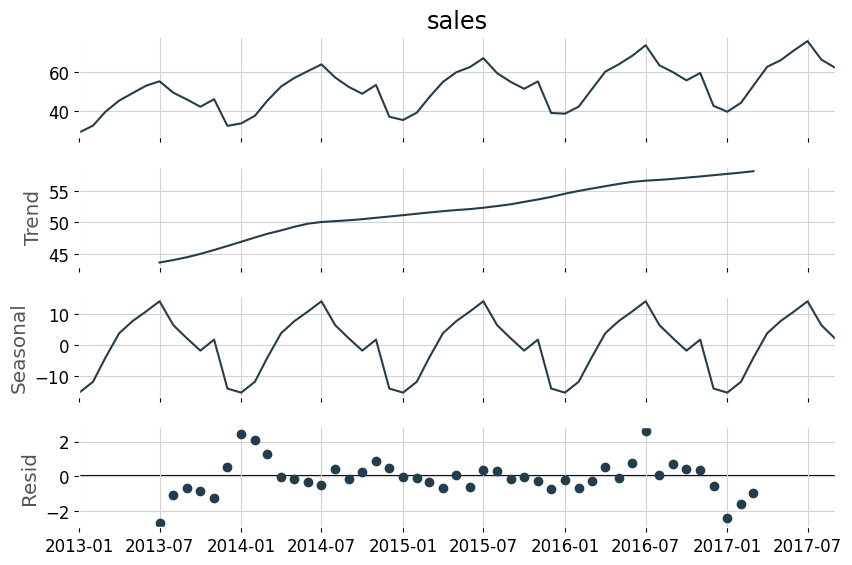

In [20]:
monthly_avg_sales = train['sales'].resample('MS').mean()
ts_decomposition = sm.tsa.seasonal_decompose(monthly_avg_sales, model='additive')

fig = plt.figure()  
fig = ts_decomposition.plot()  
fig.set_size_inches(8, 6)

1. The time series is not stationary.
2. There is an increasing trend on sales over time.
3. There is seasonality. The sales are higher around july.
4. The residuals are randomly distributed around zero. This randomness suggests that the model is capturing most of the systematic patterns in the data.

Now let's make some plots in order to visualize these characteristics and uncover more valuable insights from the data.

### Sales distribution

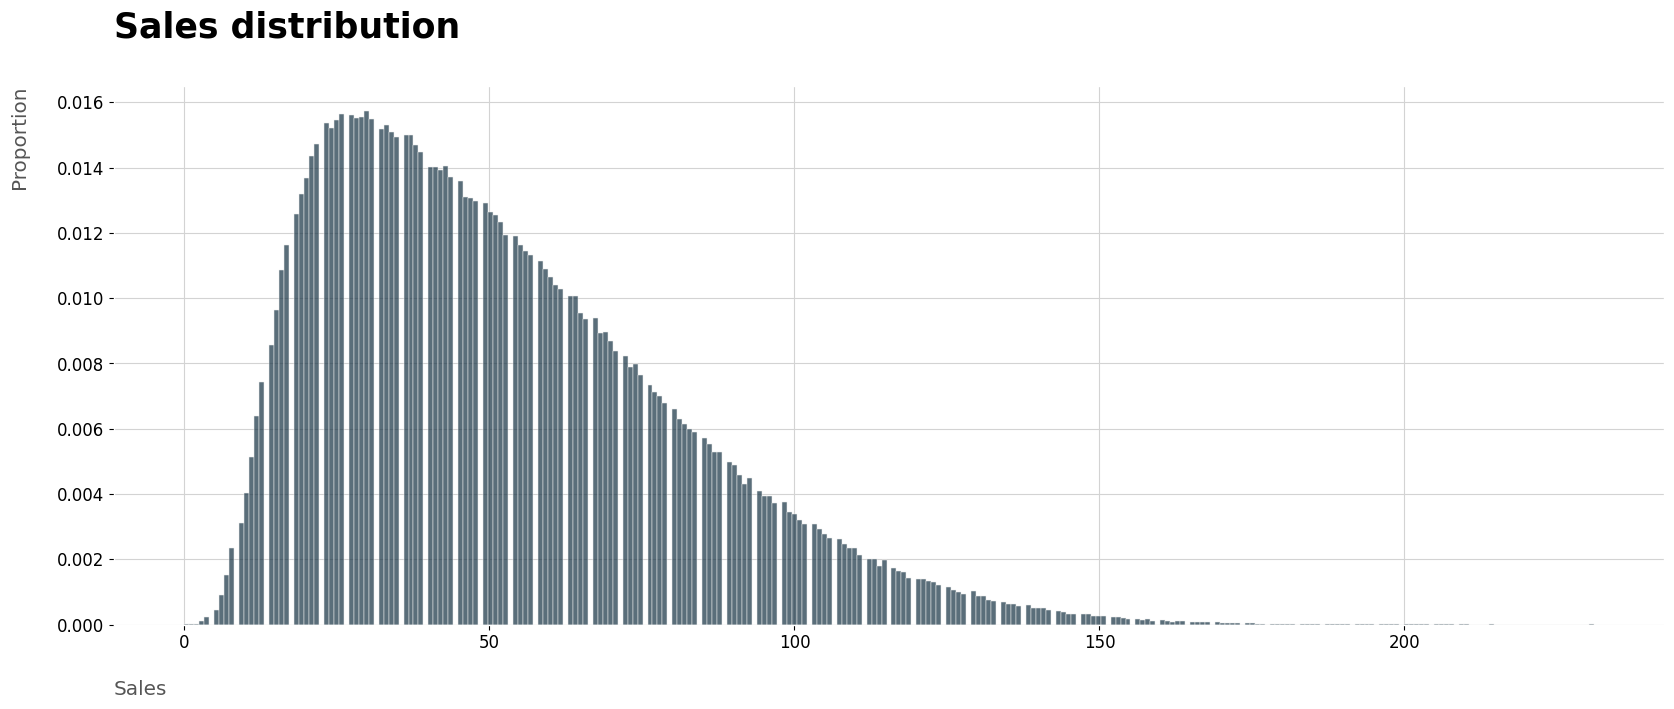

In [21]:
plt.figure(figsize=(20, 7))
sns.histplot(data=train, x='sales', stat='proportion')
plt.title('Sales distribution', loc='left', pad=35, fontsize=25, fontweight='bold')
plt.xlabel('Sales', loc='left', labelpad=20)
plt.ylabel('Proportion', loc='top', labelpad=20)
plt.show()

As expected and seen from the descriptive statistics, sales variable seems to be right-skewed (most of the sales are concentrated in lower values, while there are some outlier records containing higher sales, turning the distribution asymmetric). In the modelling step, we can apply a log-transformation (+1 considering that there are records with 0 sales) to normalize sales, making it more symmetric and allowing the model to better capture the underlying patterns.

Let's assess sales skewness and kurtosis to have a measurement of its asymmetry (degree and direction in skewness) and tails (peakedness or flatness relative to a normal distribution).

In [22]:
train['sales'].agg(['skew', 'kurtosis'])

skew        0.875904
kurtosis    0.536928
Name: sales, dtype: float64

Skewness is close to 1, indicating a significant right-skewness. The same for kurtosis.

### 📈 Overall Temporal Sales Trends

Comprehensive time series visualization showing the complete sales journey across our 5-year dataset to identify long-term trends and major pattern shifts.

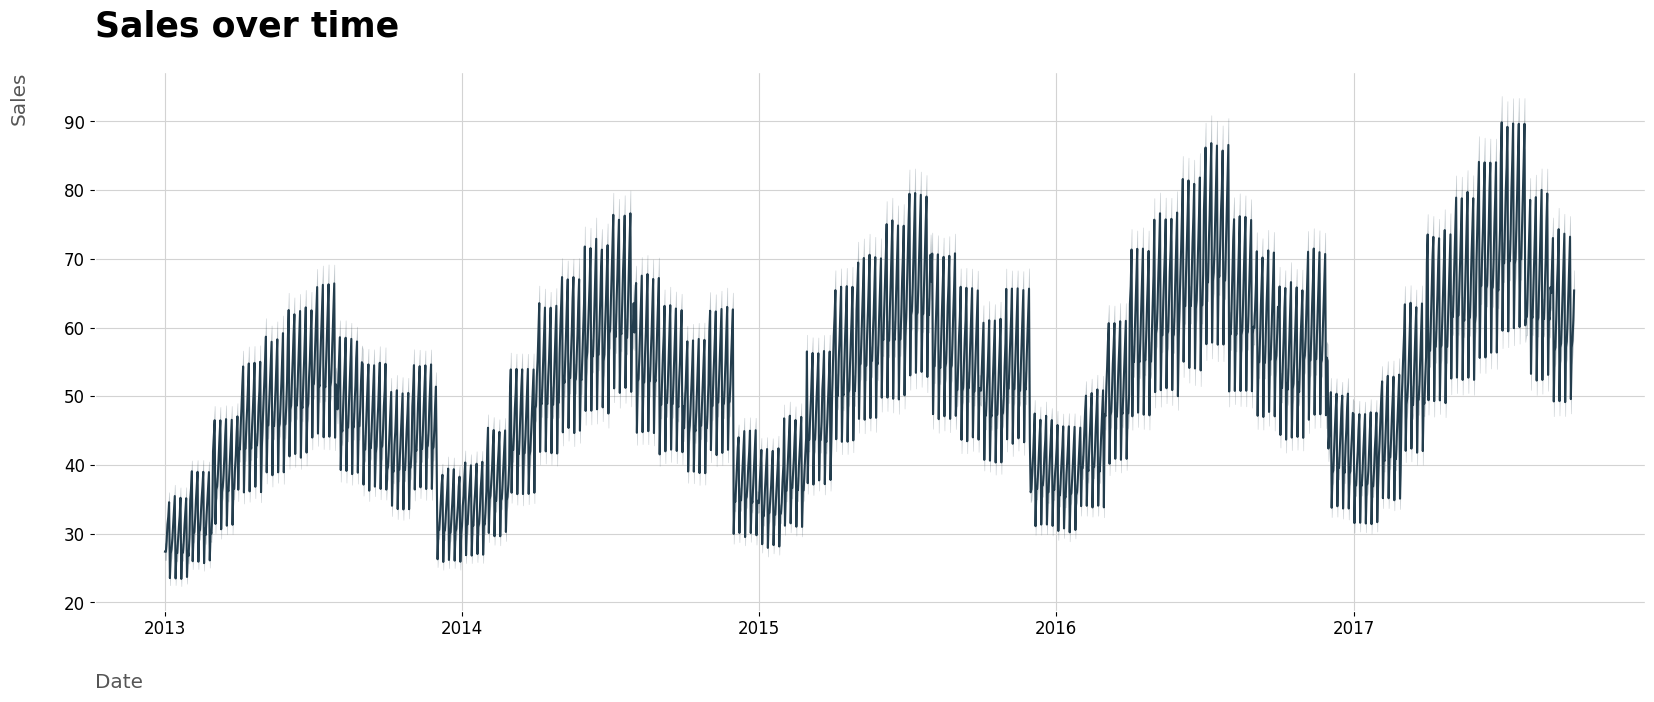

In [23]:
plt.figure(figsize=(20, 7))
plt.title('Sales over time', loc='left', fontsize=25, fontweight='bold', pad=25)
sns.lineplot(data=train, x='date', y='sales')
plt.xlabel('Date', loc='left', labelpad=25)
plt.ylabel('Sales', loc='top', labelpad=25)
plt.show()

It is possible to see an increasing trend on sales over time. Moreover, seasonality is also present. The sales are higher around july.

### 📊 **Temporal Pattern Confirmation**

**Key Observations:**
- **✅ Growth Trend Validated**: Clear upward trajectory confirms business expansion
- **📅 Seasonal Patterns Visible**: Regular peaks around July period each year
- **📈 Consistent Performance**: Stable growth without major disruptions or decline phases

**Strategic Insights:**
- **Business Health**: Sustained growth indicates strong market position
- **Predictability**: Regular seasonal patterns enable reliable forecasting
- **Investment Confidence**: Positive trends support continued business investment

### 📅 Monthly Sales Patterns by Year

Detailed analysis of seasonal patterns across different years to understand how monthly sales cycles evolve over time and identify consistent seasonal trends.

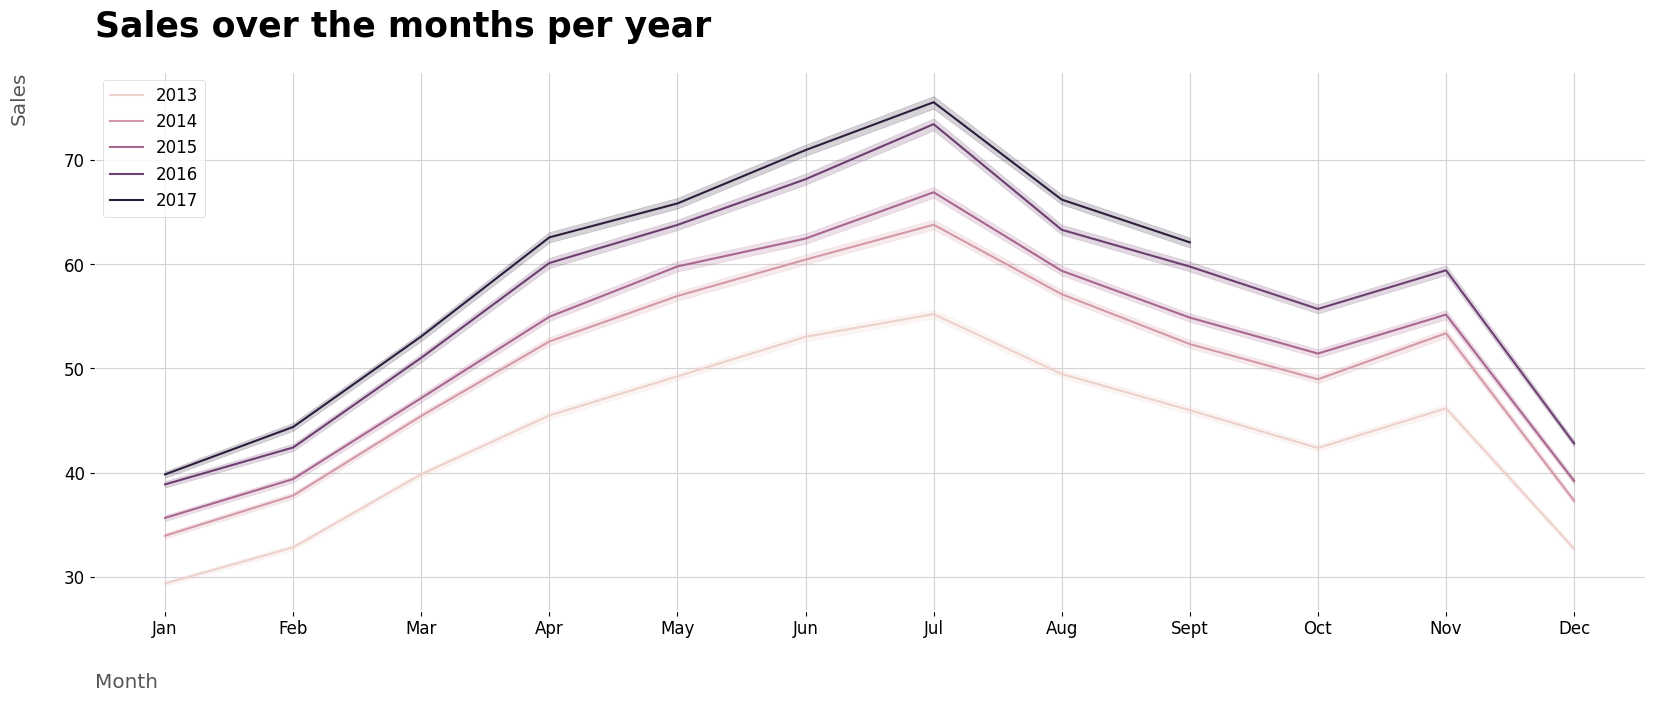

In [24]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='month', y='sales', hue='year')
plt.title('Sales over the months per year', fontsize=25, fontweight='bold', loc='left', pad=25)
plt.xlabel('Month', loc='left', labelpad=25)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Sales', loc='top', labelpad=25)   
plt.legend(loc='upper left')
plt.show()

The sales are higher in july and increase over the years.

### 🏆 **Seasonal Excellence in July**

**Consistent Summer Peak:**
- **July Dominance**: Clear seasonal peak across all years
- **Year-over-Year Growth**: July sales increase consistently each year
- **Predictable Pattern**: Reliable seasonal cycle for planning purposes

**Business Applications:**
- **📊 Inventory Strategy**: Boost July inventory 2-3 months in advance
- **🎯 Marketing Focus**: Concentrate promotional efforts before/during July
- **💰 Revenue Planning**: Expect significant revenue contribution from July sales
- **📈 Growth Trajectory**: July performance can predict annual growth

### 📊 Weekly Sales Distribution Throughout the Year

Analysis of sales patterns across the 52 weeks of the year to identify sub-seasonal trends and validate our monthly seasonal findings at a more granular level.

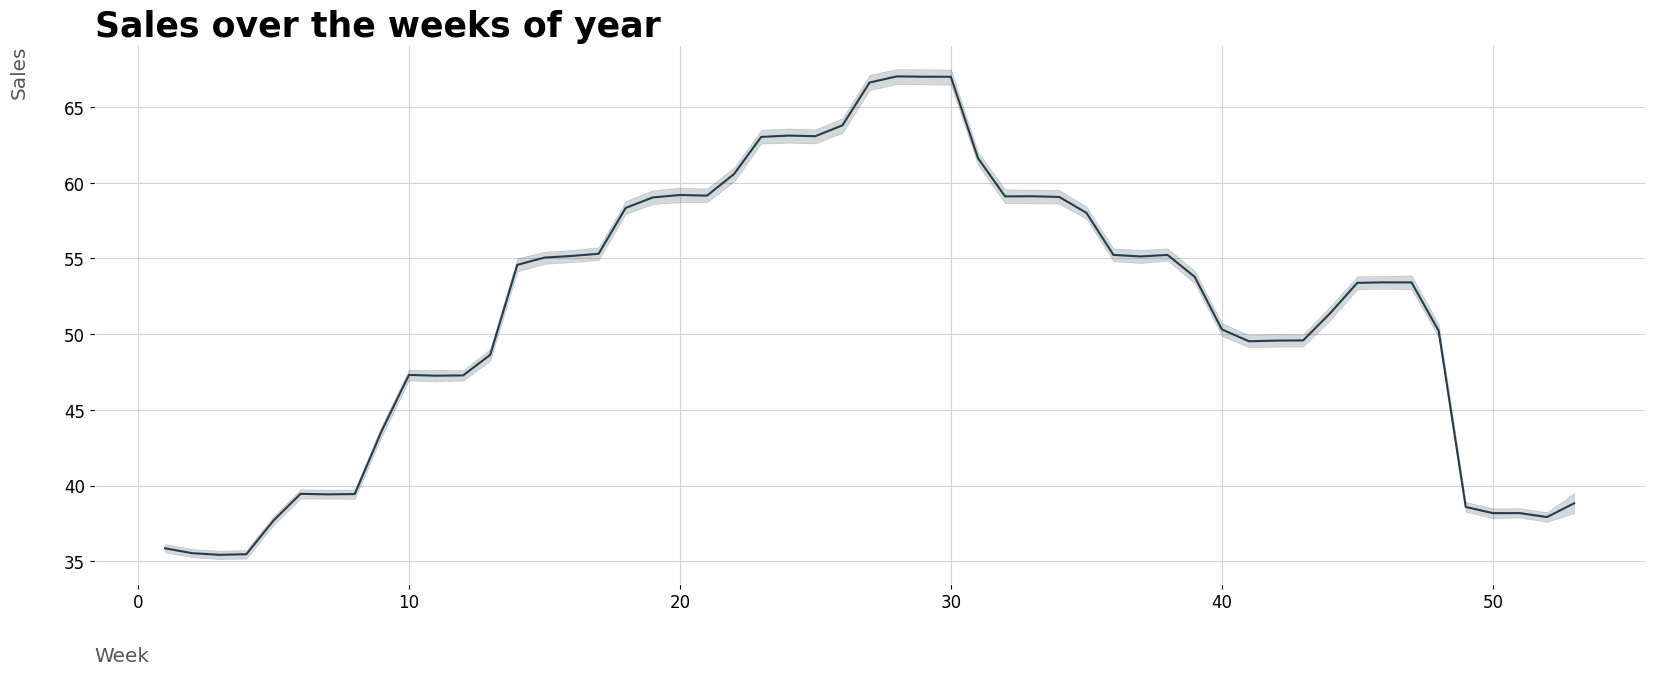

In [25]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='weekofyear', y='sales')
plt.title('Sales over the weeks of year', fontsize=25, fontweight='bold', loc='left')
plt.xlabel('Week', loc='left', labelpad=25)
plt.ylabel('Sales', loc='top', labelpad=25)
plt.show()

The weekly sales form the same pattern. Weeks around july present higher sales.

### ✅ **Weekly Pattern Validation**

**Seasonal Consistency Confirmed:**
- **Week 26-30 Peak**: Corresponds to July period (weeks 26-30 typically fall in July)
- **Pattern Alignment**: Weekly analysis confirms monthly seasonal findings
- **Granular Insights**: Specific weeks for peak inventory and staffing preparation

**Operational Value:**
- **Precise Timing**: Identify exact weeks for maximum resource allocation
- **Supply Chain**: Coordinate weekly deliveries for peak period preparation

### 📅 Weekly Sales Cycle Analysis

Examination of sales performance across different days of the week to understand customer shopping behavior and optimize daily operations.

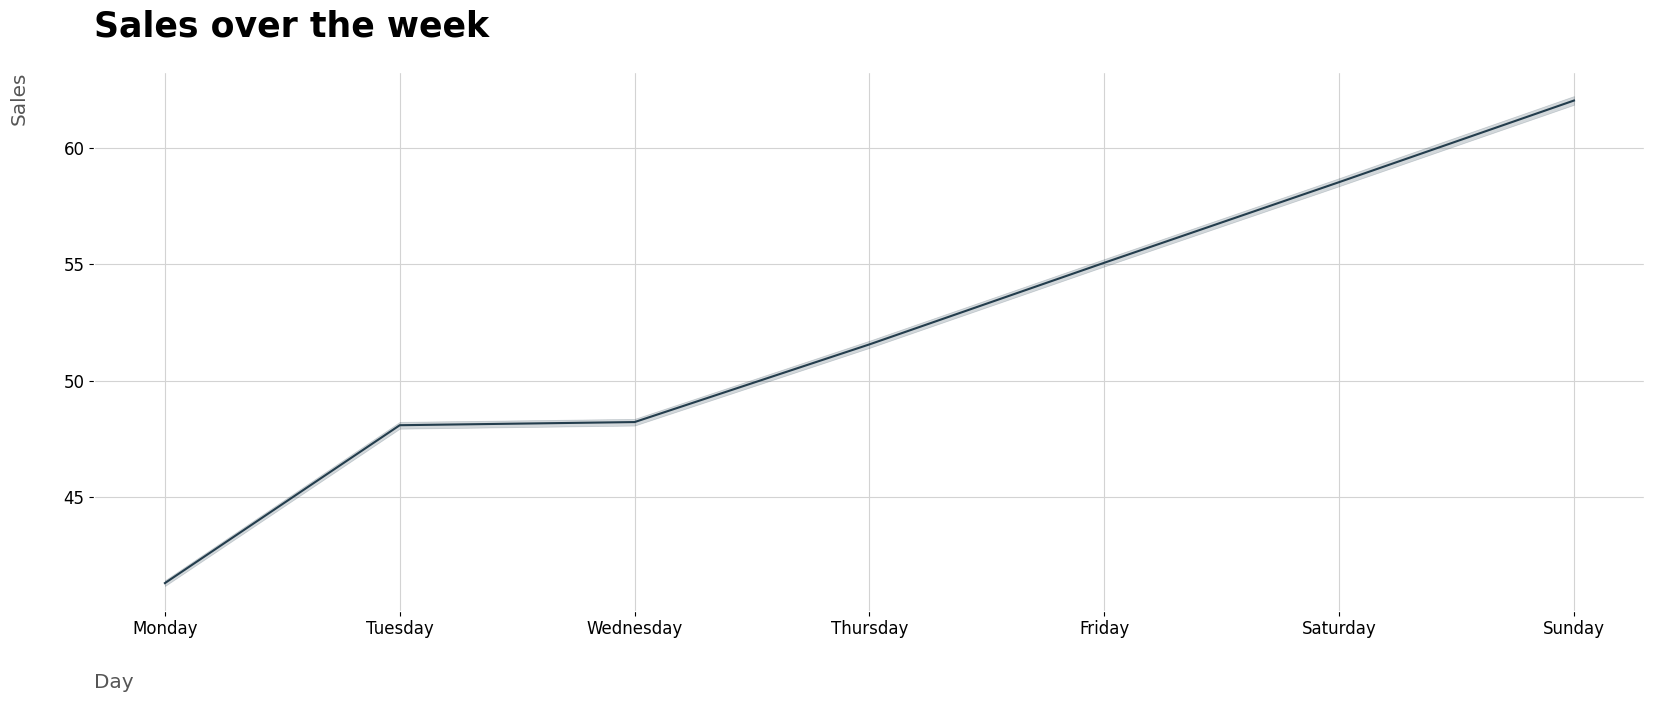

In [26]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='dayofweek', y='sales')
plt.title('Sales over the week', fontsize=25, fontweight='bold', loc='left', pad=25)
plt.xlabel('Day', loc='left', labelpad=25)
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Sales', loc='top', labelpad=25)   
plt.show()

The sales tend to increase throughout the week. Sunday presents the highest sales.

### Sales over the month

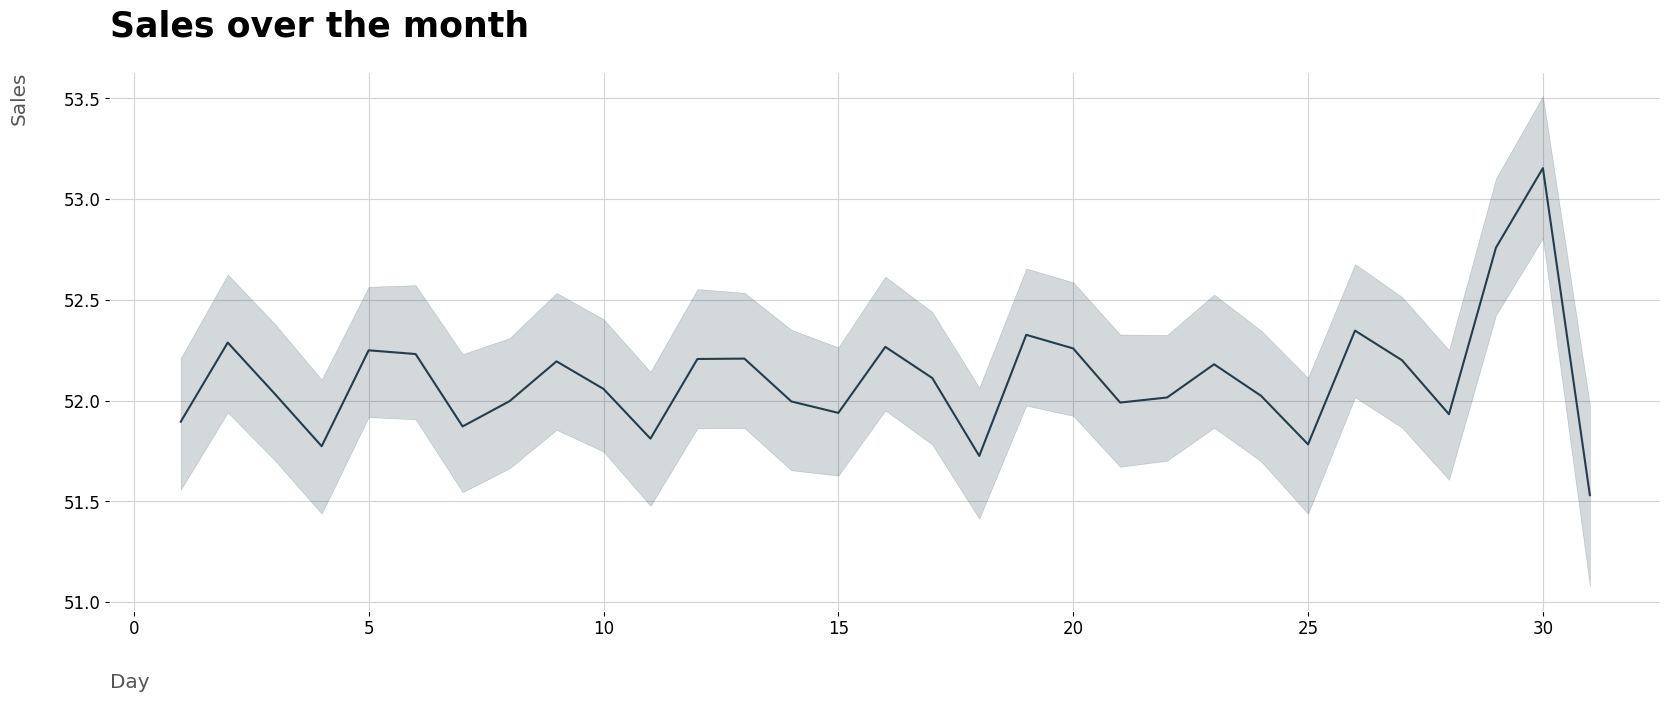

In [27]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='dayofmonth', y='sales')
plt.title('Sales over the month', fontsize=25, fontweight='bold', loc='left', pad=25)
plt.xlabel('Day', loc='left', labelpad=25)
plt.ylabel('Sales', loc='top', labelpad=25)   
plt.show()

It is noticeable that there is a peak in sales at the end of the month, especially in the 30th day.

### Sales per store

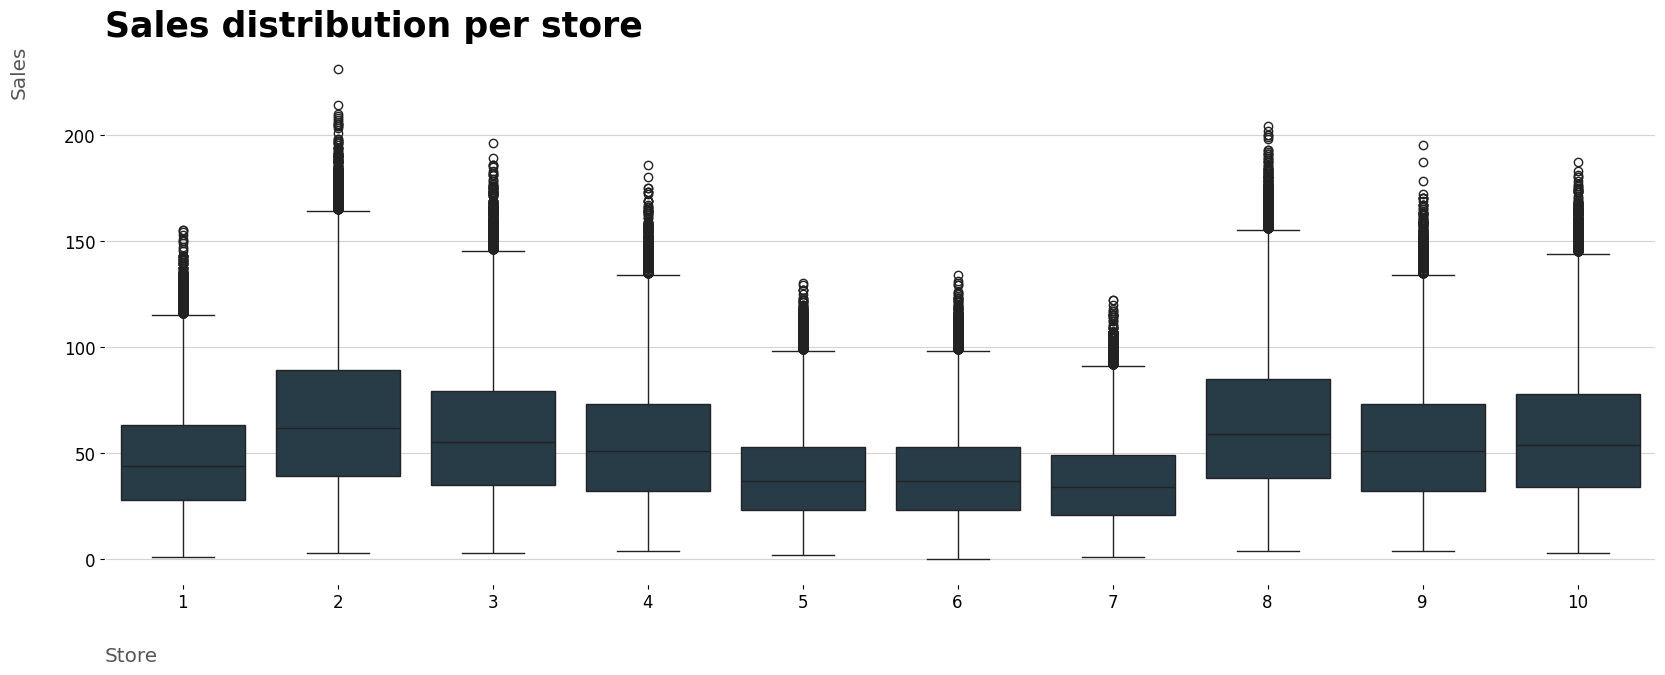

In [28]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=train, x='store', y='sales', color='#233D4D')
plt.title('Sales distribution per store', fontsize=25, fontweight='bold', loc='left')
plt.xlabel('Store', labelpad=25, loc='left')
plt.ylabel('Sales', labelpad=25, loc='top')
plt.show()

Stores 2 and 8 are the best ones. They tend make more sales. Moreover, stores 5, 6 and 7 are the worst.

### Sales per item

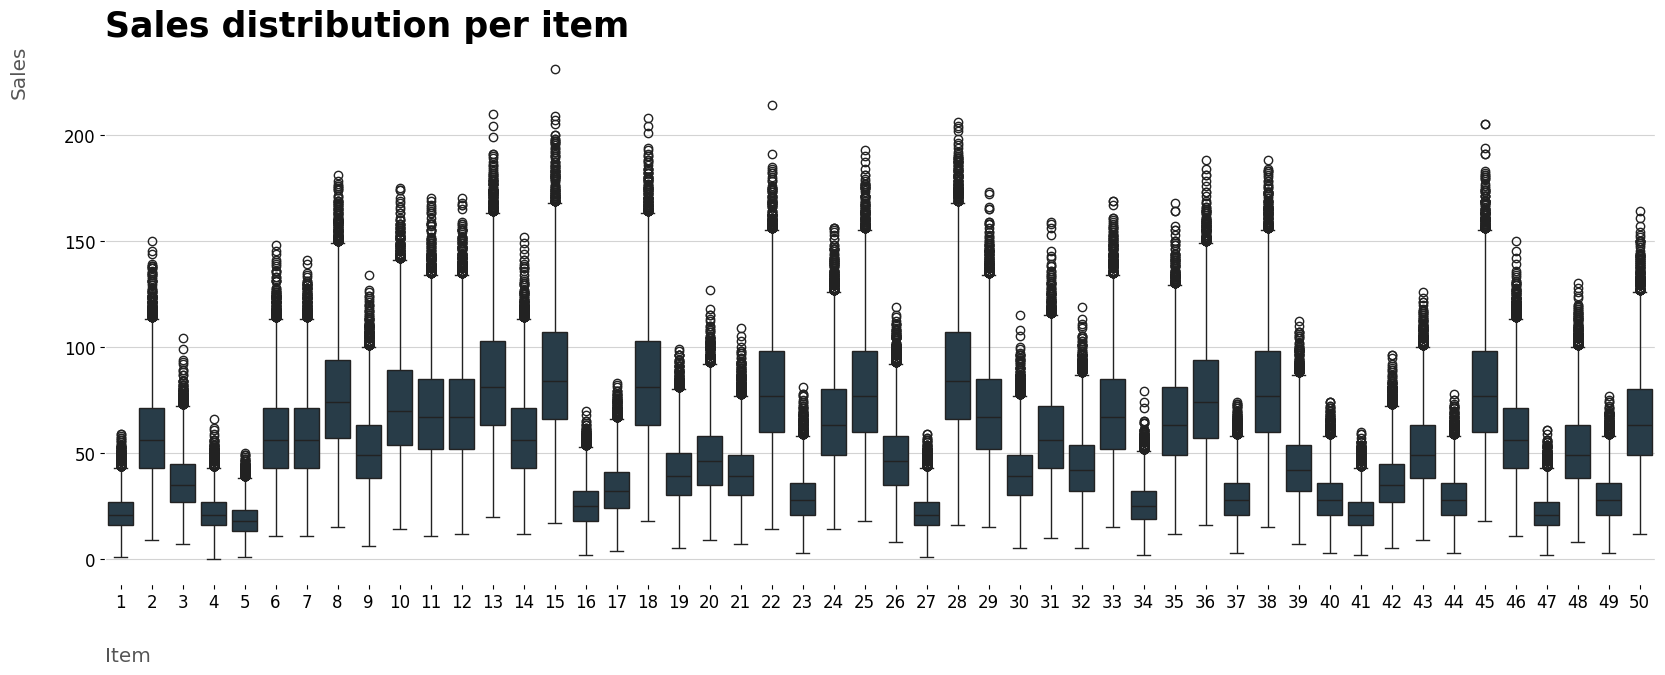

In [29]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=train, x='item', y='sales', color='#233D4D')
plt.title('Sales distribution per item', fontsize=25, fontweight='bold', loc='left')
plt.xlabel('Item', labelpad=25, loc='left')
plt.ylabel('Sales', labelpad=25, loc='top')
plt.show()

Items 28 and 15 tend to be the most sold ones.

### Outlier Analysis
I will investigate the outliers in order to assess wheter they represent measurement errors. If so, we must remove them. The outliers can affect our model. Furthermore, I will plot boxplots for outlier visualization based on the IQR method.

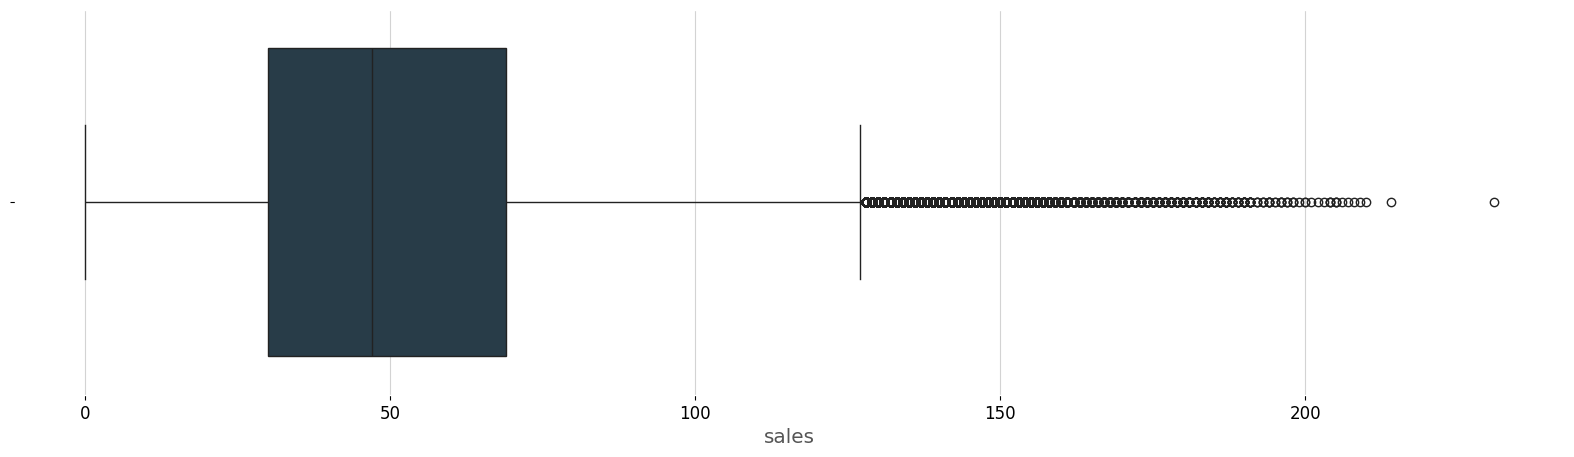

In [30]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=train, x='sales')
plt.show()

There are a lot of outliers in sales. However, naturally some stores make more sales at some time periods. Apparently there is an observation pretty further from the others. I will investigate it below.

In [31]:
train.loc[train['sales'] > 200, ['sales', 'store', 'dayofweek', 'month']]

,sales,store,dayofweek,month
date,,,,
2016-07-10,207,2,6,7
2016-07-17,209,2,6,7
2016-07-17,214,2,6,7
2016-07-24,204,2,6,7
2016-07-31,202,8,6,7
2017-07-01,204,8,5,7
2017-07-02,231,2,6,7
2017-07-02,208,2,6,7
2017-07-02,205,2,6,7


In [32]:
train.loc[train['sales'] == train['sales'].max(), ['sales', 'store', 'dayofweek', 'month']]

,sales,store,dayofweek,month
date,,,,
2017-07-02,231,2,6,7


The outliers don't represent inconsistent information. It is possible to see that the highest sales occurr in store 2, on a sunday in july. Thus, the insights we found on eda are present here and the outliers are ok. 

### EDA conclusions
Main insights:
1. The sales present an increasing trend over the years. 
2. There is seasonality in items sales. The sales are higher around july.
3. The time series data is not stationary.
4. The sales tend to increase throughout the week. Sunday presents the highest sales volume. The same is true over the month, with the 30th day presenting the higher sales volume.
5. Stores 2 and 8 are the best ones. They tend to make more sales than the others. Stores 5, 6 and 7 are the worst ones.
6. Items 28 and 15 tend to be the most sold ones.